# PRACTICA GUIADA: Regresión Lineal con scikit-learn y statsmodels

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Vamos a investigar el dataset inmobiliario usando regresión lineal. Vamos a usar dos librerías (o paquetes) diferentes, para los que pueden ver ejemplos en la documentación oficial.
* statsmodels -- [docs regresión lineal](http://statsmodels.sourceforge.net/devel/examples/#regression)
* scikit-learn -- [docs regresión lineal](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## 1. Introducción

Ya nos hemos familizarizado bastante con scikit-learn. La librería también incluye algunos datasets.

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
data = datasets.load_boston()
print (data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/home/jips/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

## 2. Conociendo el formato de los datsets de scikit-learn

In [6]:
type(data)

sklearn.utils.Bunch

> Un Bunch es un diccionario de Python dictionary que provee acceso utilizando atributos. Un Bunch es una subclase de dict y soporta todos los métodos de un dict.

In [7]:
print (data.feature_names)
print (data.data[0])
print (data.target[0])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
24.0


Como pueden ver, Scikit-learn ya separó el precio de las casas del resto de las variables.

## 3. Estimando el modelo de regresión lineal

Primero, pongamos los datos en un data frame y asegurémonos de que esté todo cargado correctamente

In [8]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

# Ponemos el target (precio de las casas -- MEDV) en otro DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Miremos las primeras filas de datos
print (df.head())
print (targets.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


* Identifiquemos visualmente algunas variables que parezcan relacionadas al precio, RM and LSTAT. 

* Hagamos un análisis por separado y luego juntas.

In [9]:
# Generamos las matrices y el target

X = df[["RM"]]
y = targets["MEDV"]

# Importamos, Instanciamos, Fiteamos, etc..

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)

print ('Intercepto=', ' ', model.intercept_)
print ('RM=', ' ', model.coef_)
print ('R2_train=', ' ', model.score(X, y))

Intercepto=   -34.67062077643857
RM=   [9.10210898]
R2_train=   0.48352545599133423


In [10]:
# Generamos una función que resume los coeficientes, el intercepto y el R2
# "model" = objeto con el modelo
# "X" = matrix de variables independientes

def sum_mod(model, X):
    a = pd.DataFrame(model.coef_ , X.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))
    return(a)

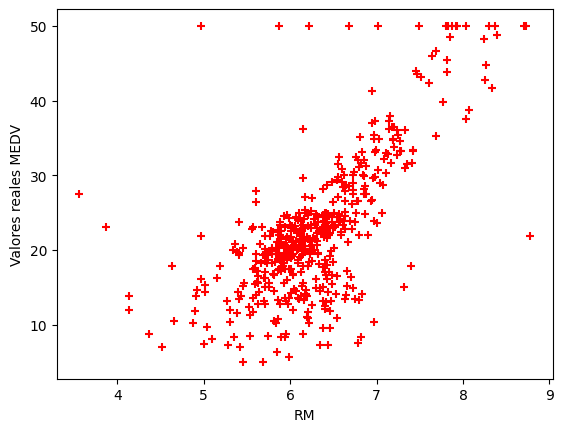

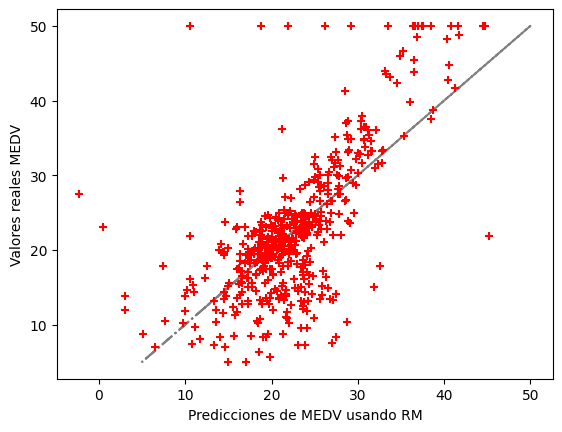

In [11]:
# Graficamos la variable X contra la variable Y
plt.scatter(X, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de MEDV usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

In [12]:
print ("EMC:", mean_squared_error(y, predictions)) # error medio cuadrático
sum_mod(model, X)

EMC: 43.60055177116956


/tmp/ipykernel_728604/1302413860.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))


,0
RM,9.102109
Intecept,-34.670621
R2,0.483525


* ¿Qué pueden decir al comparar los dos gráficos? ¿Cómo interpretan el último gráfico ? ¿Qué les dice acerca del modelo? ¿Qué pueden decir acerca de la relación entre RM y MEDV? 

* Repitamos ahora lo anterior pero usando otra variable...

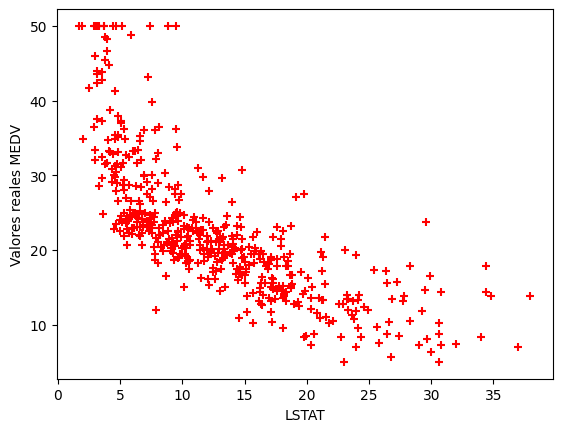

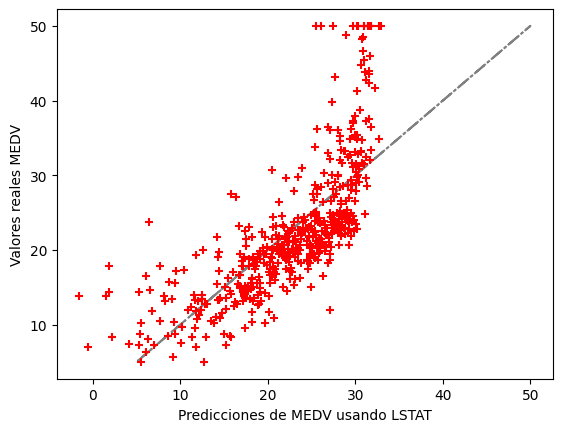

EMC: 38.48296722989415


/tmp/ipykernel_728604/1302413860.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))


,0
LSTAT,-0.950049
Intecept,34.553841
R2,0.544146


In [13]:
lm = linear_model.LinearRegression()

X = df[["LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Graficamos la variable X contra la variable Y
plt.scatter(X, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("LSTAT")
plt.ylabel("Valores reales MEDV")
plt.show()

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de MEDV usando LSTAT")
plt.ylabel("Valores reales MEDV")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
sum_mod(model, X)

* ¿Qué pueden decir al comparar éste modelo y el anterior? 
* Estimemos, ahora, un modelo usando las dos variables anteriores.

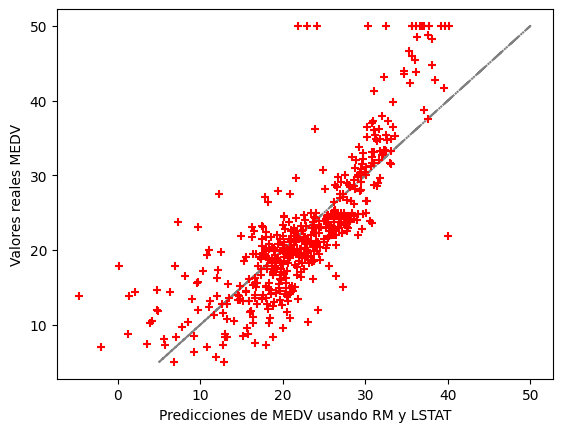

EMC: 30.51246877729947


/tmp/ipykernel_728604/1302413860.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))


,0
RM,5.094788
LSTAT,-0.642358
Intecept,-1.358273
R2,0.638562


In [14]:
lm = linear_model.LinearRegression()

X = df[["RM", "LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de MEDV usando RM y LSTAT")
plt.ylabel("Valores reales MEDV")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
prevMSE = mean_squared_error(y, predictions)
sum_mod(model, X)

## Comparando los modelos

Un modelo perfecto se vería como una línea recta a 45 grados como la que vemos en gris. Ya veremos cómo cuantificar la bondad de ajuste pronto.

### Ejercicio

Ajustar el modelo usando TODAS las variables, usando `X = df`. Esto mejora el ajuste? (comparar el EMC).

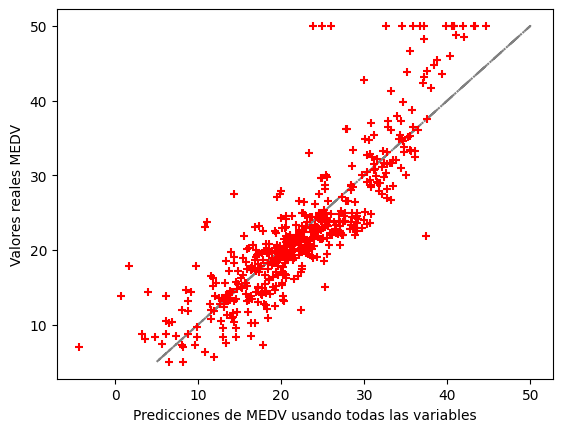

EMC: 21.894831181729202
¿Mejora?:  True
                  0
CRIM      -0.108011
ZN         0.046420
INDUS      0.020559
CHAS       2.686734
NOX      -17.766611
RM         3.809865
AGE        0.000692
DIS       -1.475567
RAD        0.306049
TAX       -0.012335
PTRATIO   -0.952747
B          0.009312
LSTAT     -0.524758
Intecept  36.459488
R2         0.740643


/tmp/ipykernel_728604/1302413860.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))


In [15]:
lm = linear_model.LinearRegression()

#X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

#Otra opción para definir X
X = df[list(df.columns.values)]

y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de MEDV usando todas las variables")
plt.ylabel("Valores reales MEDV")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
print ("¿Mejora?: ", mean_squared_error(y, predictions) < prevMSE)

print (sum_mod(model, X))

## Introducción a Statsmodels

Veamos ahora cómo se usa otra librería popular para realizar regresiones.

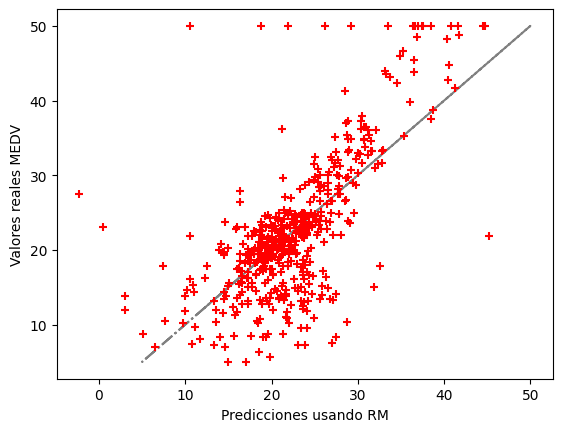

EMC: 43.60055177116956
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           2.49e-74
Time:                        12:50:54   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.

In [16]:
import statsmodels.api as sm

X = df[["RM"]]
y = targets[["MEDV"]]

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())